# 최 하단부 plt에 한국어 표시하기 위한 부분

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 단계 1: 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 폰트 적용
plt.rc('font', family='NanumBarunGothic') 

# 마운트, 기본 피쳐 불러오기

In [2]:
# mecab_noun의 클러스터링

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# 전처리 시작

In [3]:
# 데이터 불러오기

# mecab_noun = pd.read_csv('/content/drive/MyDrive/최종프로젝트/data/noun_intersection.csv', encoding='utf-8',index_col=0)
mecab_noun = pd.read_csv('/content/drive/MyDrive/Data/noun_intersection.csv', encoding='utf-8',index_col=0)

mecab_noun.head()

,keyword,intersection
0,168계단,"['광장', '예매', '하늘', '전망대', '바다', '입구', '그림', '전..."
1,25의용단,"['작품', '광장', '바다', '입구', '강', '전시관', '다양', '운영..."
2,40계단 문화관,"['광장', '작품', '예매', '전망대', '바다', '입구', '강', '전시..."
3,40계단 문화관광테마거리,"['광장', '작품', '하늘', '전망대', '바다', '입구', '그림', '예..."
4,60년전통 할매국밥,"['작품', '그릇', '바다', '입구', '그림', '강', '전통', '예약'..."


In [4]:
# intersection 컬럼을 noun로 변경하고 덮어쓰기

mecab_noun = mecab_noun.rename(columns={'intersection':'noun'})
mecab_noun.head()

,keyword,noun
0,168계단,"['광장', '예매', '하늘', '전망대', '바다', '입구', '그림', '전..."
1,25의용단,"['작품', '광장', '바다', '입구', '강', '전시관', '다양', '운영..."
2,40계단 문화관,"['광장', '작품', '예매', '전망대', '바다', '입구', '강', '전시..."
3,40계단 문화관광테마거리,"['광장', '작품', '하늘', '전망대', '바다', '입구', '그림', '예..."
4,60년전통 할매국밥,"['작품', '그릇', '바다', '입구', '그림', '강', '전통', '예약'..."


In [5]:
mecab_noun['noun'] = mecab_noun['noun'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
mecab_noun.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,keyword,noun
0,168계단,광장 예매 하늘 전망대 바다 입구 그림 전시관 예약 다양 운영 영상 감성 박물관 산...
1,25의용단,작품 광장 바다 입구 강 전시관 다양 운영 영상 박물관 색 산책로 기념 화장실 카드...
2,40계단 문화관,광장 작품 예매 전망대 바다 입구 강 전시관 예약 다양 포즈 운영 영상 감성 박물관...
3,40계단 문화관광테마거리,광장 작품 하늘 전망대 바다 입구 그림 예약 다양 포즈 운영 영상 감성 박물관 소주...
4,60년전통 할매국밥,작품 그릇 바다 입구 그림 강 전통 예약 운영 수육 감성 소주 향 기념 화장실 유명...


#### 축제 제외한 관광지만 추출
  - 성격이 뚜렷한 축제를 제외하고 돌리면 어떤 결과가 나올지 궁금해서 진행한거니 이 부분은 패스하고 진행해도 무방

In [ ]:
# # 축제 제외한 관광지만 추출

# except_festival = mecab_noun[mecab_noun['keyword'].str.contains('축제')]
# except_festival

In [ ]:
# # noun에서 각 단어가 몇 번 나오는지 세기

# from collections import Counter

# count = Counter(mecab_noun['noun'].str.split(expand=True).stack())

# count.most_common()

In [ ]:
# noun에서 1글자인 단어를 삭제

# mecab_noun['noun'] = mecab_noun['noun'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

# mecab_noun.head()

17:27 중복단어 삭제 안 하고 돌리기

#### mecab_noun은 이미 중복이 없이 전처리했기 때문에 이 과정 pass

In [ ]:
# mecab_adj 컬럼에서 집합을 이용해 중복되는 단어를 삭제

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: set(x.split()))

df_mecab_adj.head()

In [ ]:
# { 를 [ 로 }를 ]로 바꾸기

df_mecab_adj['mecab_adj'] = df_mecab_adj['mecab_adj'].apply(lambda x: str(x).replace('{', '[').replace('}', ']'))

df_mecab_adj.head()



In [ ]:
print(df_mecab_adj.size)
print(df_mecab_adj.shape)

# 벡터화 준비

In [6]:
# konlpy 설치

!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 539 kB/s 
     |████████████████████████████████| 465 kB 50.2 MB/s 


In [7]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
# mecab_noun의 noun를 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(mecab_noun['noun'])

tfidf_matrix.shape

(566, 372)

# 클러스터링

In [9]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

kmeans = KMeans(n_clusters=4, init='random', n_init=563, max_iter=300, tol=1e-04, random_state=42).fit(tfidf_matrix)

kmeans.labels_

array([1, 1, 1, 1, 3, 0, 3, 3, 3, 0, 1, 1, 1, 3, 0, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 3, 3, 2, 3, 3, 3, 1, 3, 0, 1, 1, 3, 1, 1, 3, 3, 0, 2, 0, 1,
       1, 0, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 0, 0, 1, 2, 3, 3,
       3, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 2, 3, 1,
       1, 1, 1, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 1,
       3, 0, 1, 1, 1, 1, 3, 3, 2, 3, 2, 3, 3, 0, 1, 1, 3, 1, 1, 3, 1, 3,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 1, 1, 1, 3, 3, 3, 3, 2,
       1, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1,
       1, 1, 2, 3, 3, 3, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1, 1, 3,
       1, 1, 1, 3, 0, 2, 3, 0, 0, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 2, 0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 3, 3, 0, 1, 3, 1, 0,
       0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 1,
       3, 3, 1, 2, 1, 0, 3, 1, 0, 3, 3, 1, 0, 1, 0,

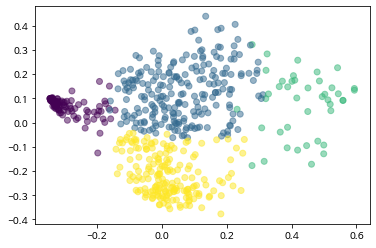

In [10]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65279 missing from current font.
  font.set_text(s, 0, flags=flags)


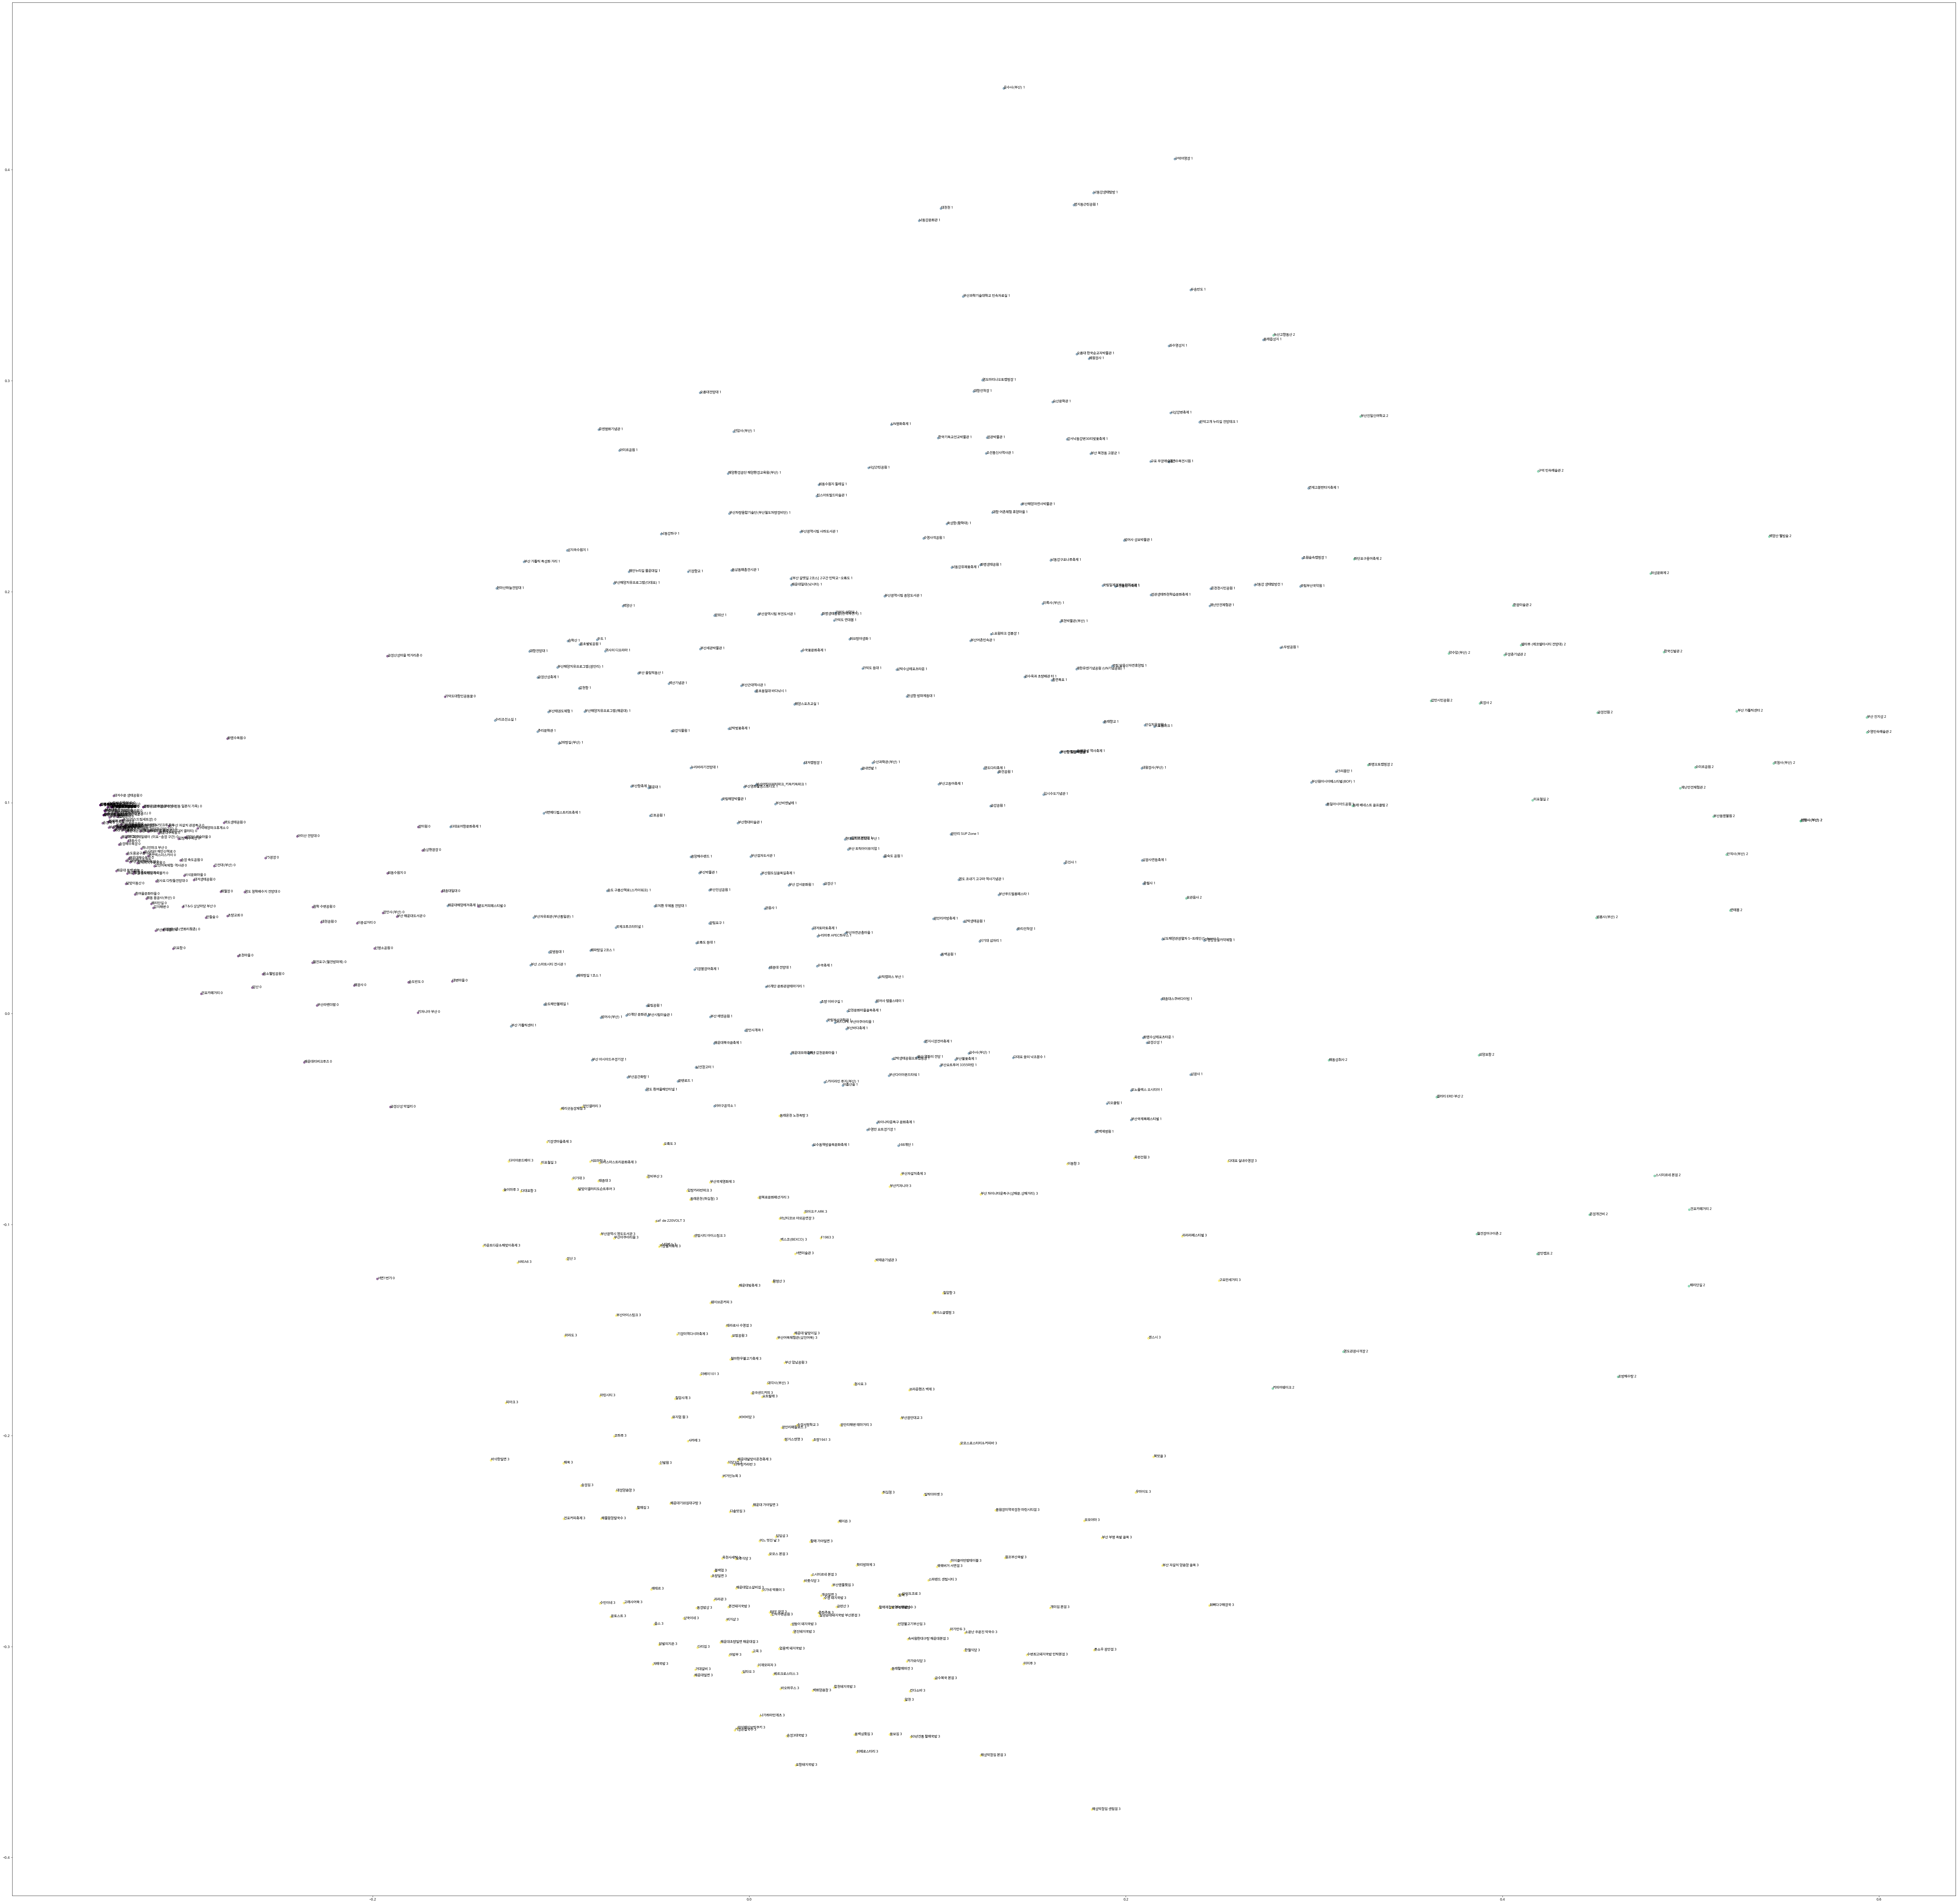

In [11]:
plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i] + ' ' + str(kmeans.labels_[i]))

plt.show()

# 이하는 확인을 위해 돌린 부분

오류 원인은 클러스터링 하는 코드 부분 오류로 예상되고, 클러스터링 하는 코드 부분 정리함

In [ ]:
'''for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i] + ' ' + str(kmeans.labels_[i]))

의 mecab_noun['keyword'][i] + ' ' + str(kmeans.labels_[i]) 부분을 확인

    '''
# mecab_noun['keyword'][i] + ' ' + str(kmeans.labels_[i]) 부분을 확인

mecab_noun['keyword'][i] + ' ' + str(kmeans.labels_[i])

In [ ]:
# keyword에 중복값 있나 확인

mecab_noun['keyword'].duplicated().sum()

In [ ]:
# 중복값이 있는 행만 추출

mecab_noun[mecab_noun['keyword'].duplicated(keep=False)]

In [ ]:
# mecab_noun['keyword'][i] 확인

mecab_noun['keyword'][0]

In [ ]:
# 각 keyword별로 클러스터링 결과를 확인

mecab_noun['cluster'] = y_km
mecab_noun.head()

In [ ]:
labels = km.labels_

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km, alpha=0.5)

for i in range(len(pca_data[:, 0])):
    plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i], fontsize=10)




plt.show()

In [ ]:
# 클러스터링 결과를 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km, s=50, cmap='viridis')

# km.cluster_centers_ 표시

centers = km.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# for i in range(len(pca_data[:, 0])):
#   plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i] + ' ' + str(labels[i]))

plt.show()

In [ ]:
# 시각화 플롯에 keyword와 label 표시



plt.show()

In [ ]:
labels

#### 클러스터별 관광지 목록 확인

In [ ]:
mecab_noun['cluster'] = labels
mecab_noun

In [ ]:
cluster_1 = mecab_noun[mecab_noun['cluster'] == 0]
cluster_1

In [ ]:
cluster_2 = mecab_noun[mecab_noun['cluster'] == 1]
cluster_2

In [ ]:
cluster_3 = mecab_noun[mecab_noun['cluster'] == 2]
cluster_3

In [ ]:
cluster_4 = mecab_noun[mecab_noun['cluster'] == 3]
cluster_4

In [ ]:
# cluster_1, cluster_2, cluster_3, cluster_4 concat 

cluster_label = pd.concat([cluster_1, cluster_2, cluster_3, cluster_4], ignore_index=True)
cluster_label

In [ ]:
# concat한 cluster_label 따로 저장

cluster_label.to_csv('/content/drive/MyDrive/최종프로젝트/data/noun_cluster_result.csv', encoding='utf-8-sig')

# 시각화

In [ ]:
plt.figure(figsize=(100, 100))

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=0.5)

for i in range(len(pca_data[:, 0])):
  plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i] + ' ' + str(labels[i]))


plt.show()

## 축제 제외한 관광지 목록으로 클러스터링 진행

In [ ]:
# except_festival(축제 제외한 관광지)의 noun을 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(except_festival['noun'])

tfidf_matrix.shape

In [ ]:
# n_clusters= 클러스터 갯 수, init='k-means++', n_init= ???, max_iter= 최초 시작할 때 이동시킬 중심점, tol=1e-04, random_state= 난수
# init='random'으로 변경

km = KMeans(

    n_clusters=4, init='random', n_init=563, max_iter=300, tol=1e-04, random_state=42

)

y_km = km.fit_predict(tfidf_matrix)


# 클러스터링 결과를 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km, s=50, cmap='viridis')

# km.cluster_centers_ 표시

# centers = km.cluster_centers_

# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# for i in range(len(pca_data[:, 0])):
  # plt.text(pca_data[i, 0], pca_data[i, 1], mecab_noun['keyword'][i] + ' ' + str(labels[i]))

plt.show()

In [ ]:
labels = km.labels_

In [ ]:
labels

In [ ]:
# 시각화 하되 keyword의 이름을 표시하고 각 keyword의 이름과 km.labels_의 cluster 숫자를 점 옆에 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km)

for i in range(len(pca_data)):
  try:
    plt.text(pca_data[i, 0], pca_data[i, 1], except_festival['keyword'][i] + ' ' + str(km.labels_[i]))
  except:
    print(i)
  # plt.text(pca_data[i, 0], pca_data[i, 1], except_festival['keyword'][i] + ' ' + str(km.labels_[i]))

# x축과 y축의 이름을 표시
    
plt.xlabel('PCA1')

plt.ylabel('PCA2')

plt.show()

### 클러스터별 관광지 목록(축제 제외) 확인

In [ ]:
except_festival['cluster'] = labels
except_festival

In [ ]:
cluster1 = except_festival[except_festival['cluster']==0]
cluster1

In [ ]:
cluster2 = except_festival[except_festival['cluster']==1]
cluster2

In [ ]:
cluster3 = except_festival[except_festival['cluster']==2]
cluster3

In [ ]:
cluster4 = except_festival[except_festival['cluster']==3]
cluster4

In [ ]:
# 각 클러스터별 관광지 개수 확인

print(len(cluster1), len(cluster2), len(cluster3), len(cluster4))

In [ ]:
result = pd.concat([cluster1, cluster2, cluster3, cluster4], ignore_index=True)
result

In [ ]:
result.to_csv('/content/drive/MyDrive/최종프로젝트/data/not_festival_noun_cluster_result.csv', encoding='utf-8-sig')

In [ ]:
# 시각화 하되 keyword의 이름을 표시하고 각 keyword의 이름과 km.labels_의 cluster 숫자를 점 옆에 표시

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 100))

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_km)

for i in range(len(pca_data)):
  try:
    plt.text(pca_data[i, 0], pca_data[i, 1], except_festival['keyword'][i] + ' ' + str(km.labels_[i]))
  except:
    print(i)

# x축과 y축의 이름을 표시
    
plt.xlabel('PCA1')

plt.ylabel('PCA2')

plt.show()



---



In [ ]:
# 클러스터링 결과를 데이터프레임에 추가

mecab_noun['cluster'] = y_km

mecab_noun.head()

# 클러스터링 결과를 csv 파일로 저장

mecab_noun.to_csv('df_mecab_adj.csv', index=False)

# 클러스터링 결과를 엑셀 파일로 저장

mecab_noun.to_excel('df_mecab_adj.xlsx', index=False)

In [ ]:
# 중심점을 구하기

km.cluster_centers_


In [ ]:
# 각 클러스터의 중심 단어

import numpy as np

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()

for i in range(3):

    print("Cluster %d:" % i, end='')

    for ind in order_centroids[i, :10]:

        print(' %s' % terms[ind], end='')

    print()

# 하단 무시

# K-Medroids

In [ ]:
! pip install scikit-learn-extra

In [ ]:
# 위 df_mecab_adj의 mecab_adj를 KMedoids로 클러스터링

from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=2, random_state=0).fit(tfidf_matrix)

kmedoids.labels_


In [ ]:
# 위 결과를 시각화

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf_matrix.toarray())

pca_data = pca.transform(tfidf_matrix.toarray())

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids.labels_, alpha=0.5)

plt.show()